# Libraries and versions

In [106]:
python_version = !python -V #version 3.8.8
import pandas as pd #version 1.2.4
import numpy as np #version 1.20.1
import seaborn as sns #version 0.11.1
import matplotlib as plt #version 3.3.4
import jebas

In [105]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'Statsmodels version - {sm_version}')

Python version - 3.8.8
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.1
Matplotlib version - 3.3.4
Statsmodels version - 0.12.2


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Seaborn

In [4]:
sns.set_palette('inferno')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(20,6)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

================================================================

## Background
When is my university campus gym least crowded, so I know when to work out? We measured how many people were in this gym once every 10 minutes over the last year. We want to be able to predict how crowded the gym will be in the future.

### Goals
**1)** Given a time of day (and maybe some other features, including weather), predict how crowded the gym will be.

**2)** Figure out which features are actually important, which are redundant, and what features could be added to make the predictions more accurate.

### Data
The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Features:

- date (string; datetime of data)
- timestamp (int; number of seconds since beginning of day)
- dayofweek (int; 0 [monday] - 6 [sunday])
- is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
- is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
- temperature (float; degrees fahrenheit)
- isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
- month (int; 1 [jan] - 12 [dec])
- hour (int; 0 - 23)


Kaggle link: https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym

================================================================

## Dataset

In [6]:
gym = pd.read_csv('data.csv')
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


================================================================

### Observations:
- there are no missing values for all features
- feature date is not in datetime format (**second** to do)
- feature timestamp will be not necessary (**third** to do)
- must be necessary create two new features = year and day (**first** to do)

================================================================

## Transformations

#### New features

In [8]:
#year
gym['year'] = gym['date'].str.split('-', expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,2015
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,2015
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,2015
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,2015
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,2015


In [9]:
#day
gym['day_of_month'] = gym['date'].str.split('-', expand=True)[2]
gym['day_of_month'] = gym['day_of_month'].str.split(expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17,2015,14


In [10]:
#date
gym['date'] = gym['date'].str.split(expand=True)[0]
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14,61211,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14,62414,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14,63015,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14,63616,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14,64217,4,0,0,71.76,0,0,8,17,2015,14


#### Drop timestamp

In [11]:
gym.drop(columns=['timestamp'], inplace=True)
gym.head()

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month
0,37,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
1,45,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
2,40,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
3,44,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14
4,45,2015-08-14,4,0,0,71.76,0,0,8,17,2015,14


# EDA

## Dependent feature - univariate analysis

In [12]:
gym['number_people'].describe()

count    62184.000000
mean        29.072543
std         22.689026
min          0.000000
25%          9.000000
50%         28.000000
75%         43.000000
max        145.000000
Name: number_people, dtype: float64

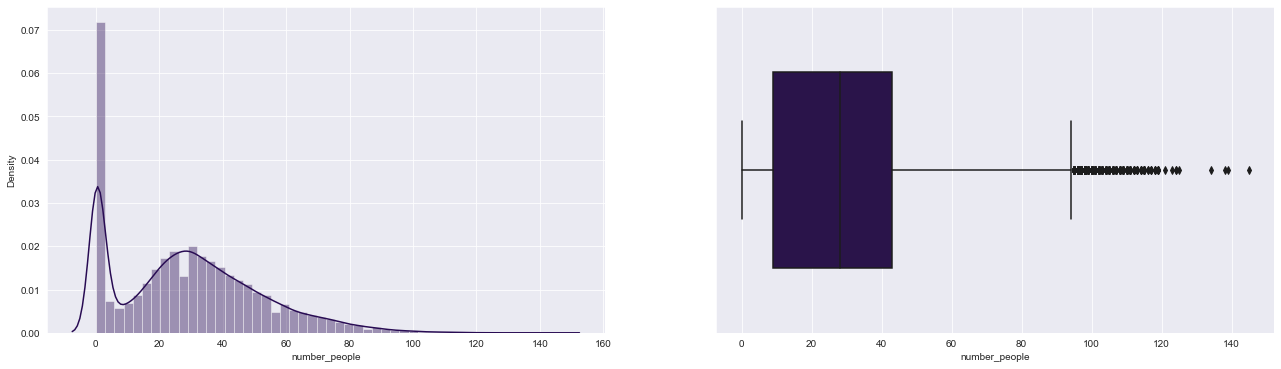

In [13]:
fig, axes = plt.pyplot.subplots(1,2, figsize=(22,6))

sns.distplot(gym['number_people'], ax=axes[0])
sns.boxplot(gym['number_people'], width=0.6, ax=axes[1])
plt.pyplot.show()

================================================================
- the feature number_people is not a normal distribution and have some outliers above (almost) 96 persons in gym in one day

- there are very moments which the number of people in gym is zero; what are the gym's opening hours?

================================================================

In [14]:
gym['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16,  2,  3,  4], dtype=int64)

In [15]:
gym.query('number_people==0')['hour'].value_counts(normalize=True).round(2)

3     0.15
2     0.15
4     0.13
5     0.12
1     0.12
0     0.08
6     0.07
23    0.05
7     0.04
22    0.02
21    0.02
20    0.01
8     0.01
19    0.01
9     0.01
10    0.00
18    0.00
16    0.00
15    0.00
17    0.00
11    0.00
14    0.00
12    0.00
13    0.00
Name: hour, dtype: float64

================================================================
- seems the gym is opening 24 hrs a day

- gym is more empty the late hours (23, 0, 1...6) - that is a obvious observation

- how will be the distribution if consider olny moments when gym has people?

================================================================

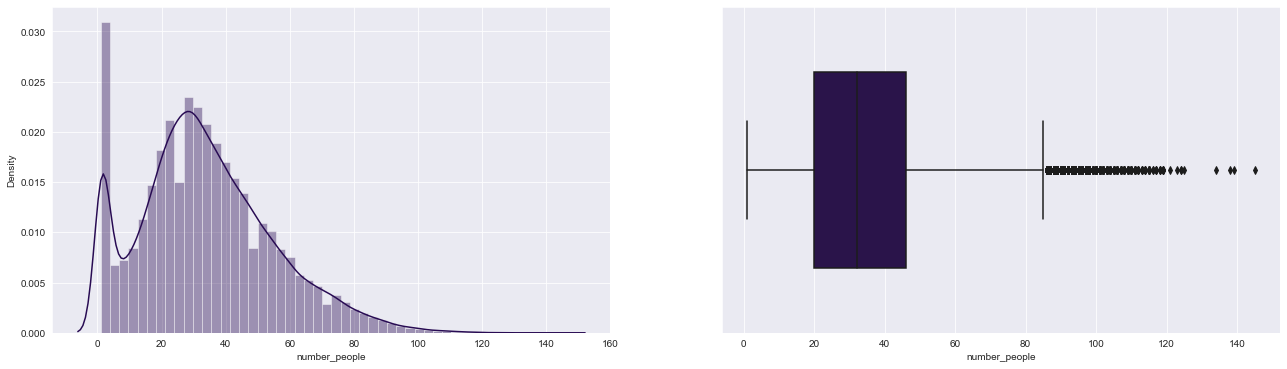

In [16]:
fig, axes = plt.pyplot.subplots(1,2, figsize=(22,6))

sns.distplot(gym.query('number_people!=0')['number_people'], ax=axes[0])
sns.boxplot(gym.query('number_people!=0')['number_people'], width=0.6, ax=axes[1])
plt.pyplot.show()

================================================================
- the distribution was not normalized and there are outliers in maximum limit

- seems when the number of persons is bigger then almost 83 (the original data these number is almost 96)/ the gym is crowed. let's understand more about it.

================================================================

### Outliers analysis

In [17]:
jebas.outliers_valores(dados=gym['number_people'])

1° quartil                 9.0
3° quartil                43.0
Intervalo interquartil    34.0
Limite inferior          -42.0
Limite Superior           94.0
dtype: float64

- 94 is the upper limit (mean plus standard deviation) of people in gym 

================================================================

As the database does not inform about the size of the gym, I will consider that it will be overcrowded when the number of people is greater than the upper limit.

**I will create a feature that classifies into 3 classes:**

**bellow_mean** (below or equal to average)

**above_mean** (between mean and upper limit)

**crowded** (above upper limit)

================================================================

#### new feature

In [18]:
upper_limit = jebas.outliers_valores(dados=gym['number_people']).loc['Limite Superior']
mean = gym['number_people'].mean()

class_crowded = []
for number in gym['number_people'].values:
    if number >= upper_limit:
        class_crowded.append('crowded')
    elif number > mean:
        class_crowded.append('above_mean')
    else:
        class_crowded.append('bellow_mean')

gym['class_crowded'] = class_crowded
gym.sample(20)

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month,class_crowded
14533,23,2016-01-10,6,1,0,52.53,0,0,1,18,2016,10,bellow_mean
59503,20,2017-01-03,1,0,0,53.64,0,0,1,16,2017,03,bellow_mean
28534,19,2016-05-25,2,0,0,60.00,0,0,5,14,2016,25,bellow_mean
1155,71,2015-08-25,1,0,0,64.97,0,0,8,18,2015,25,above_mean
25030,1,2016-04-29,4,0,0,53.24,0,1,4,5,2016,29,bellow_mean
13054,0,2015-12-26,5,1,0,47.50,0,0,12,20,2015,26,bellow_mean
17052,70,2016-02-05,4,0,0,61.38,0,1,2,15,2016,05,above_mean
47294,24,2016-10-08,5,1,0,75.22,0,1,10,17,2016,08,bellow_mean
56038,20,2016-12-10,5,1,0,57.39,0,1,12,14,2016,10,bellow_mean
36388,31,2016-07-21,3,0,0,59.00,0,0,7,22,2016,21,above_mean


In [19]:
#Count new features in all time periods
gym['class_crowded'].value_counts(normalize=True)

bellow_mean    0.530313
above_mean     0.463335
crowded        0.006352
Name: class_crowded, dtype: float64

In [20]:
#Count new feature without number_people==0
gym.query('number_people!=0')['class_crowded'].value_counts(normalize=True)

above_mean     0.539460
bellow_mean    0.453145
crowded        0.007396
Name: class_crowded, dtype: float64

================================================================

- in my classification, between only 6% or 7% of time gym is crowded

- when start engineering of model will be necessary fix inbalance of class

- how this variable works with other features?

================================================================

### Crosstables

In [21]:
#Hour
print('Results with columns %')
pd.crosstab(index=gym['class_crowded'], columns=gym['hour'], margins=True, margins_name='total')

Results with columns %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,503,3,0,0,0,0,37,402,930,1380,1593,1651,1690,1595,1532,1772,2076,2256,2285,2176,1989,1949,1847,1146,28812
bellow_mean,2475,1779,1520,1517,1437,2441,2721,2389,1868,1419,1203,1140,1113,1213,1249,1002,701,550,475,596,779,774,895,1721,32977
crowded,0,0,0,0,0,0,0,0,0,0,0,0,2,4,6,4,31,105,77,47,27,56,33,3,395
total,2978,1782,1520,1517,1437,2441,2758,2791,2798,2799,2796,2791,2805,2812,2787,2778,2808,2911,2837,2819,2795,2779,2775,2870,62184


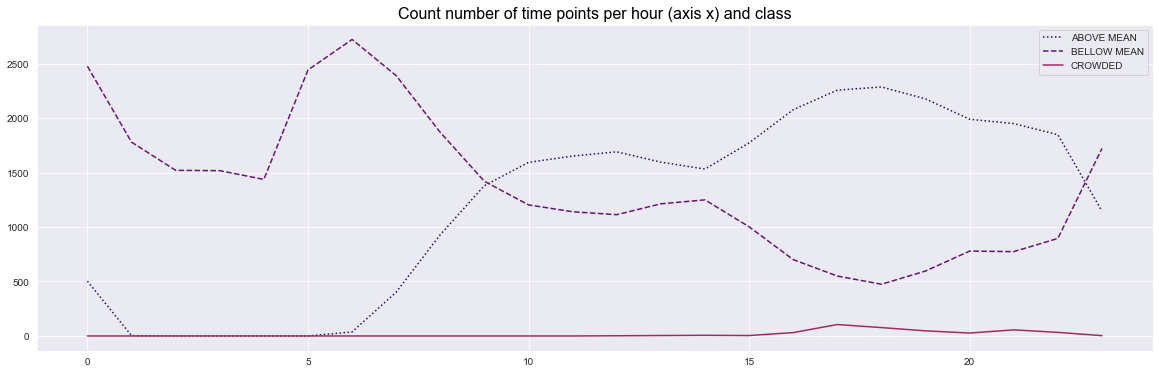

In [22]:
#Graphic
above_mean = pd.crosstab(index=gym['class_crowded'], columns=gym['hour']).loc['above_mean']
bellow_mean = pd.crosstab(index=gym['class_crowded'], columns=gym['hour']).loc['bellow_mean']
crowded = pd.crosstab(index=gym['class_crowded'], columns=gym['hour']).loc['crowded']

g1 = sns.lineplot(x=above_mean.index, y=above_mean.values, label='ABOVE MEAN', linestyle='dotted')
g1 = sns.lineplot(x=bellow_mean.index, y=bellow_mean.values, label='BELLOW MEAN', linestyle='dashed')
g1 = sns.lineplot(x=crowded.index, y=crowded.values, label='CROWDED', linestyle='solid')
configuration(g1, title='Count number of time points per hour (axis x) and class', colors='black')

In [23]:
#Hour
print('Results with index %')
pd.crosstab(index=gym['class_crowded'], columns=gym['hour'], normalize='columns', margins=True, margins_name='total').round(3)

Results with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.169,0.002,0.0,0.0,0.0,0.0,0.013,0.144,0.332,0.493,0.57,0.592,0.602,0.567,0.550,0.638,0.739,0.775,0.805,0.772,0.712,0.701,0.666,0.399,0.463
bellow_mean,0.831,0.998,1.0,1.0,1.0,1.0,0.987,0.856,0.668,0.507,0.43,0.408,0.397,0.431,0.448,0.361,0.250,0.189,0.167,0.211,0.279,0.279,0.323,0.600,0.530
crowded,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.001,0.001,0.002,0.001,0.011,0.036,0.027,0.017,0.010,0.020,0.012,0.001,0.006


In [24]:
#Hour
print('Results with index %')
pd.crosstab(index=gym['class_crowded'], columns=gym['hour'], normalize='index', margins=True, margins_name='total').round(3)

Results with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
class_crowded,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.017,0.000,0.000,0.000,0.000,0.000,0.001,0.014,0.032,0.048,0.055,0.057,0.059,0.055,0.053,0.062,0.072,0.078,0.079,0.076,0.069,0.068,0.064,0.040
bellow_mean,0.075,0.054,0.046,0.046,0.044,0.074,0.083,0.072,0.057,0.043,0.036,0.035,0.034,0.037,0.038,0.030,0.021,0.017,0.014,0.018,0.024,0.023,0.027,0.052
crowded,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.010,0.015,0.010,0.078,0.266,0.195,0.119,0.068,0.142,0.084,0.008
total,0.048,0.029,0.024,0.024,0.023,0.039,0.044,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.047,0.046,0.045,0.045,0.045,0.045,0.046


================================================================
- between 9am and 10pm the most of data points is above_mean, and increase more after 4pm
- between 4pm and 10pm are concentrated 96% of all data points when gym was crowded, but the most frequency occour in 5pm and takes only 3,6% of all data points in that hour
- using ONLY this feature, I risk say that: if someone goes to gym at 5pm there is 3,6% of chance of it being crowded and this can happen 26,6% of times at that hour
- Using this method of classification, the probability of gym will be crowded is VERY LOW
- IS MY METHOD GOOD TO SPLIT TIME POINTS FOR CLASSIFIATION? Let's see the statistics again...

================================================================

## Change crowded
### Statistics from number_people

In [25]:
gym['number_people'].describe()

count    62184.000000
mean        29.072543
std         22.689026
min          0.000000
25%          9.000000
50%         28.000000
75%         43.000000
max        145.000000
Name: number_people, dtype: float64

================================================================
- Standad deviaton is almost equal mean, so I will use another method: crowded will be considered when the number of people in gym will be above mean **plus** standard deviation

================================================================

In [26]:
mean = gym['number_people'].mean()
std = gym['number_people'].std()
upper_limit = round(mean + std, 0)

class_crowded = []
for number in gym['number_people'].values:
    if number >= upper_limit:
        class_crowded.append('crowded')
    elif number > mean:
        class_crowded.append('above_mean')
    else:
        class_crowded.append('bellow_mean')

gym['class_crowded_2'] = class_crowded
gym.sample(20)

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month,class_crowded,class_crowded_2
39372,31,2016-08-11,3,0,0,62.33,0,0,8,17,2016,11,above_mean,above_mean
44250,1,2016-09-16,4,0,0,55.54,0,1,9,5,2016,16,bellow_mean,bellow_mean
29989,32,2016-06-04,5,1,0,60.00,0,0,6,19,2016,04,above_mean,above_mean
55551,1,2016-12-07,2,0,0,42.33,0,1,12,4,2016,07,bellow_mean,bellow_mean
3403,31,2015-09-18,4,0,0,62.55,0,1,9,7,2015,18,above_mean,above_mean
24671,49,2016-04-25,0,0,0,59.22,0,1,4,11,2016,25,above_mean,above_mean
6579,3,2015-10-21,2,0,0,60.36,0,1,10,5,2015,21,bellow_mean,bellow_mean
44774,51,2016-09-19,0,0,0,63.06,0,1,9,22,2016,19,above_mean,above_mean
11312,13,2015-12-09,2,0,0,56.28,0,1,12,6,2015,09,bellow_mean,bellow_mean
30999,32,2016-06-12,6,1,0,65.23,0,0,6,12,2016,12,above_mean,above_mean


In [27]:
#Count new features in all time periods
gym['class_crowded_2'].value_counts(normalize=True)

bellow_mean    0.530313
above_mean     0.307812
crowded        0.161874
Name: class_crowded_2, dtype: float64

In [28]:
#Count new feature without number_people==0
gym.query('number_people!=0')['class_crowded_2'].value_counts(normalize=True)

bellow_mean    0.453145
above_mean     0.358385
crowded        0.188470
Name: class_crowded_2, dtype: float64

### Crosstables crowded_2

In [29]:
#Hour
print('Results with columns %')
pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour'], margins=True, margins_name='total')

Results with columns %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded_2,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,421,3,0,0,0,0,37,396,842,1167,1184,1105,1208,1188,1191,1240,1294,1299,1277,1254,1165,1122,1099,649,19141
bellow_mean,2475,1779,1520,1517,1437,2441,2721,2389,1868,1419,1203,1140,1113,1213,1249,1002,701,550,475,596,779,774,895,1721,32977
crowded,82,0,0,0,0,0,0,6,88,213,409,546,484,411,347,536,813,1062,1085,969,851,883,781,500,10066
total,2978,1782,1520,1517,1437,2441,2758,2791,2798,2799,2796,2791,2805,2812,2787,2778,2808,2911,2837,2819,2795,2779,2775,2870,62184


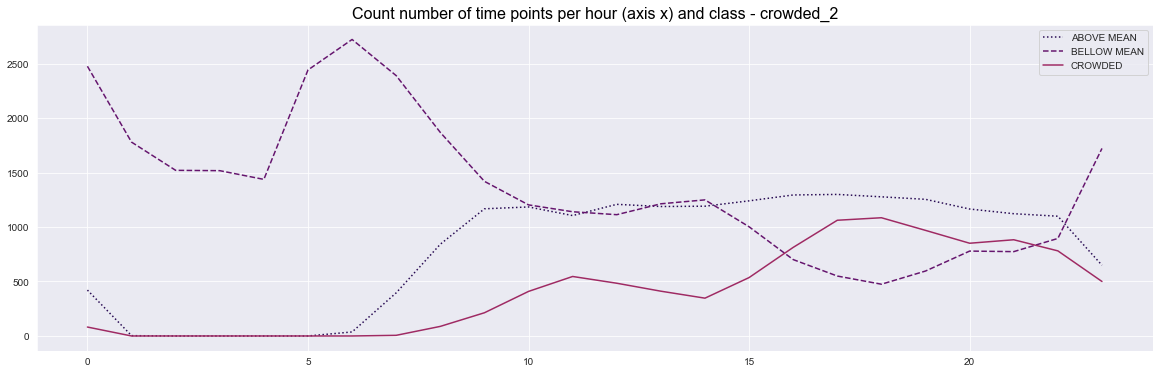

In [30]:
#Graphic
above_mean = pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour']).loc['above_mean']
bellow_mean = pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour']).loc['bellow_mean']
crowded = pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour']).loc['crowded']

g2 = sns.lineplot(x=above_mean.index, y=above_mean.values, label='ABOVE MEAN', linestyle='dotted')
g2 = sns.lineplot(x=bellow_mean.index, y=bellow_mean.values, label='BELLOW MEAN', linestyle='dashed')
g2 = sns.lineplot(x=crowded.index, y=crowded.values, label='CROWDED', linestyle='solid')
configuration(g2, title='Count number of time points per hour (axis x) and class - crowded_2', colors='black')

In [31]:
#Hour
print('Results with index %')
pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour'], normalize='columns', margins=True, margins_name='total').round(3)

Results with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded_2,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.141,0.002,0.0,0.0,0.0,0.0,0.013,0.142,0.301,0.417,0.423,0.396,0.431,0.422,0.427,0.446,0.461,0.446,0.450,0.445,0.417,0.404,0.396,0.226,0.308
bellow_mean,0.831,0.998,1.0,1.0,1.0,1.0,0.987,0.856,0.668,0.507,0.430,0.408,0.397,0.431,0.448,0.361,0.250,0.189,0.167,0.211,0.279,0.279,0.323,0.600,0.530
crowded,0.028,0.000,0.0,0.0,0.0,0.0,0.000,0.002,0.031,0.076,0.146,0.196,0.173,0.146,0.125,0.193,0.290,0.365,0.382,0.344,0.304,0.318,0.281,0.174,0.162


In [32]:
#Hour
print('Results for class_crowded_2 with index %')
pd.crosstab(index=gym['class_crowded_2'], columns=gym['hour'], normalize='index', margins=True, margins_name='total').round(3)

Results for class_crowded_2 with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
class_crowded_2,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.022,0.000,0.000,0.000,0.000,0.000,0.002,0.021,0.044,0.061,0.062,0.058,0.063,0.062,0.062,0.065,0.068,0.068,0.067,0.066,0.061,0.059,0.057,0.034
bellow_mean,0.075,0.054,0.046,0.046,0.044,0.074,0.083,0.072,0.057,0.043,0.036,0.035,0.034,0.037,0.038,0.030,0.021,0.017,0.014,0.018,0.024,0.023,0.027,0.052
crowded,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.009,0.021,0.041,0.054,0.048,0.041,0.034,0.053,0.081,0.106,0.108,0.096,0.085,0.088,0.078,0.050
total,0.048,0.029,0.024,0.024,0.023,0.039,0.044,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.047,0.046,0.045,0.045,0.045,0.045,0.046


================================================================

- seems which new split of class increases a lot with these new calculation, but seems more accepted to me
- then it is necessary split more data in bottom for apply the same criterion for all variable
- so, I will use **mean minus std** for create a new class "empty"

================================================================

# Feature class_crowded_3

In [33]:
mean = gym['number_people'].mean()
std = gym['number_people'].std()
lower_limit = round(mean - std, 0)
upper_limit = round(mean + std, 0)

class_crowded = []
for number in gym['number_people'].values:
    if number >= upper_limit:
        class_crowded.append('crowded')
    elif number > mean:
        class_crowded.append('above_mean')
    elif number > lower_limit:
        class_crowded.append('bellow_mean')
    else:
        class_crowded.append('empty')

gym['class_crowded_3'] = class_crowded
gym.sample(20)

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month,class_crowded,class_crowded_2,class_crowded_3
56020,25,2016-12-10,5,1,0,57.64,0,1,12,11,2016,10,bellow_mean,bellow_mean,bellow_mean
47400,25,2016-10-10,0,0,0,61.06,0,1,10,14,2016,10,bellow_mean,bellow_mean,bellow_mean
19998,45,2016-03-06,6,1,0,58.00,0,1,3,15,2016,06,above_mean,above_mean,above_mean
26289,48,2016-05-09,0,0,0,57.00,0,1,5,18,2016,09,above_mean,above_mean,above_mean
48705,41,2016-10-19,2,0,0,67.78,0,1,10,16,2016,19,above_mean,above_mean,above_mean
31688,0,2016-06-19,6,1,0,63.67,0,0,6,3,2016,19,bellow_mean,bellow_mean,empty
60877,32,2017-03-01,2,0,0,55.26,0,1,3,12,2017,01,above_mean,above_mean,above_mean
52260,14,2016-11-13,6,1,0,64.08,0,1,11,15,2016,13,bellow_mean,bellow_mean,bellow_mean
7690,44,2015-11-01,6,1,0,65.28,0,1,11,15,2015,01,above_mean,above_mean,above_mean
54901,40,2016-12-02,4,0,0,60.87,0,1,12,15,2016,02,above_mean,above_mean,above_mean


In [34]:
#Count new features in all time periods
gym['class_crowded_3'].value_counts(normalize=True)

above_mean     0.307812
bellow_mean    0.295928
empty          0.234385
crowded        0.161874
Name: class_crowded_3, dtype: float64

In [35]:
#Count new feature without number_people==0
gym.query('number_people!=0')['class_crowded_3'].value_counts(normalize=True)

above_mean     0.358385
bellow_mean    0.344549
crowded        0.188470
empty          0.108596
Name: class_crowded_3, dtype: float64

In [36]:
#Hour
print('Results with columns %')
pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour'], margins=True, margins_name='total')

Results with columns %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded_3,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,421,3,0,0,0,0,37,396,842,1167,1184,1105,1208,1188,1191,1240,1294,1299,1277,1254,1165,1122,1099,649,19141
bellow_mean,1275,219,0,0,0,9,1488,1470,1565,1232,1032,1096,1084,1186,1201,952,662,490,419,425,555,543,665,834,18402
crowded,82,0,0,0,0,0,0,6,88,213,409,546,484,411,347,536,813,1062,1085,969,851,883,781,500,10066
empty,1200,1560,1520,1517,1437,2432,1233,919,303,187,171,44,29,27,48,50,39,60,56,171,224,231,230,887,14575
total,2978,1782,1520,1517,1437,2441,2758,2791,2798,2799,2796,2791,2805,2812,2787,2778,2808,2911,2837,2819,2795,2779,2775,2870,62184


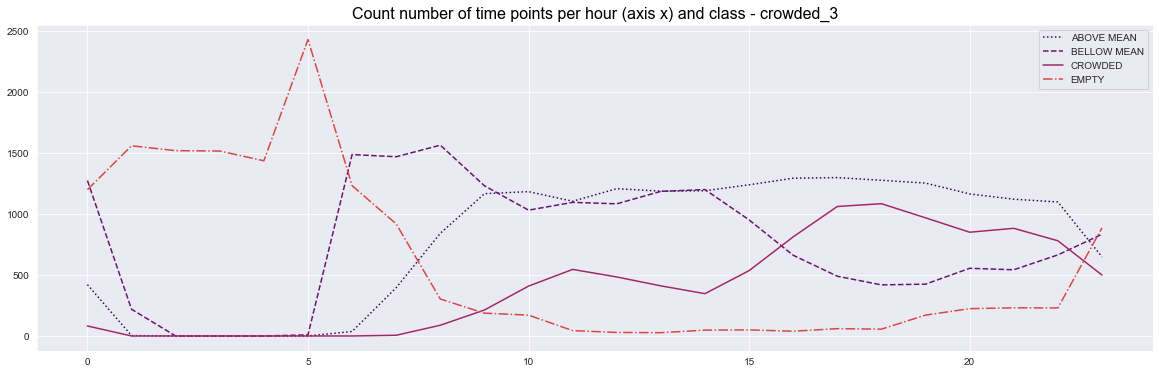

In [37]:
#Graphic
above_mean = pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour']).loc['above_mean']
bellow_mean = pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour']).loc['bellow_mean']
crowded = pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour']).loc['crowded']
empty = pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour']).loc['empty']

g2 = sns.lineplot(x=above_mean.index, y=above_mean.values, label='ABOVE MEAN', linestyle='dotted')
g2 = sns.lineplot(x=bellow_mean.index, y=bellow_mean.values, label='BELLOW MEAN', linestyle='dashed')
g2 = sns.lineplot(x=crowded.index, y=crowded.values, label='CROWDED', linestyle='solid')
g2 = sns.lineplot(x=empty.index, y=empty.values, label='EMPTY', linestyle='dashdot')
configuration(g2, title='Count number of time points per hour (axis x) and class - crowded_3', colors='black')

In [38]:
#Hour
print('Results with index %')
pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour'], normalize='columns', margins=True, margins_name='total').round(3)

Results with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,total
class_crowded_3,,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.141,0.002,0.0,0.0,0.0,0.000,0.013,0.142,0.301,0.417,0.423,0.396,0.431,0.422,0.427,0.446,0.461,0.446,0.450,0.445,0.417,0.404,0.396,0.226,0.308
bellow_mean,0.428,0.123,0.0,0.0,0.0,0.004,0.540,0.527,0.559,0.440,0.369,0.393,0.386,0.422,0.431,0.343,0.236,0.168,0.148,0.151,0.199,0.195,0.240,0.291,0.296
crowded,0.028,0.000,0.0,0.0,0.0,0.000,0.000,0.002,0.031,0.076,0.146,0.196,0.173,0.146,0.125,0.193,0.290,0.365,0.382,0.344,0.304,0.318,0.281,0.174,0.162
empty,0.403,0.875,1.0,1.0,1.0,0.996,0.447,0.329,0.108,0.067,0.061,0.016,0.010,0.010,0.017,0.018,0.014,0.021,0.020,0.061,0.080,0.083,0.083,0.309,0.234


In [39]:
#Hour
print('Results for class_crowded_3 with index %')
pd.crosstab(index=gym['class_crowded_3'], columns=gym['hour'], normalize='index', margins=True, margins_name='total').round(3)

Results for class_crowded_3 with index %


hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
class_crowded_3,,,,,,,,,,,,,,,,,,,,,,,,
above_mean,0.022,0.000,0.000,0.000,0.000,0.000,0.002,0.021,0.044,0.061,0.062,0.058,0.063,0.062,0.062,0.065,0.068,0.068,0.067,0.066,0.061,0.059,0.057,0.034
bellow_mean,0.069,0.012,0.000,0.000,0.000,0.000,0.081,0.080,0.085,0.067,0.056,0.060,0.059,0.064,0.065,0.052,0.036,0.027,0.023,0.023,0.030,0.030,0.036,0.045
crowded,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.009,0.021,0.041,0.054,0.048,0.041,0.034,0.053,0.081,0.106,0.108,0.096,0.085,0.088,0.078,0.050
empty,0.082,0.107,0.104,0.104,0.099,0.167,0.085,0.063,0.021,0.013,0.012,0.003,0.002,0.002,0.003,0.003,0.003,0.004,0.004,0.012,0.015,0.016,0.016,0.061
total,0.048,0.029,0.024,0.024,0.023,0.039,0.044,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.047,0.046,0.045,0.045,0.045,0.045,0.046


================================================================

- the data is very different for each calculation on class_crowded feature and there are pros and cons with last one:

**PROS**: clear distinction of periods with lower persons in gym (between mid-night and 6am)

**CONS**: did not change the distinction in periods of greater concentration of people in the gym (between 4pm and 10pm) / will be more difficult hit prediction with 4 classes

- I think which class_crowded_3 has more sense, because the same calculation were apply on top and bottom of data and the data was more centralized with almost 60% of all classes in the "middle"

================================================================

# Deep analysis with class_crowded_3

In [40]:
#create a function
def series_tsa(data, filter_criterion):
    pd_series = data.query('class_crowded_3==@filter_criterion').groupby('date')['number_people'].sum()
    df = pd_series.to_frame()
    df = df.set_index(keys=pd.to_datetime(df.index))
    return df

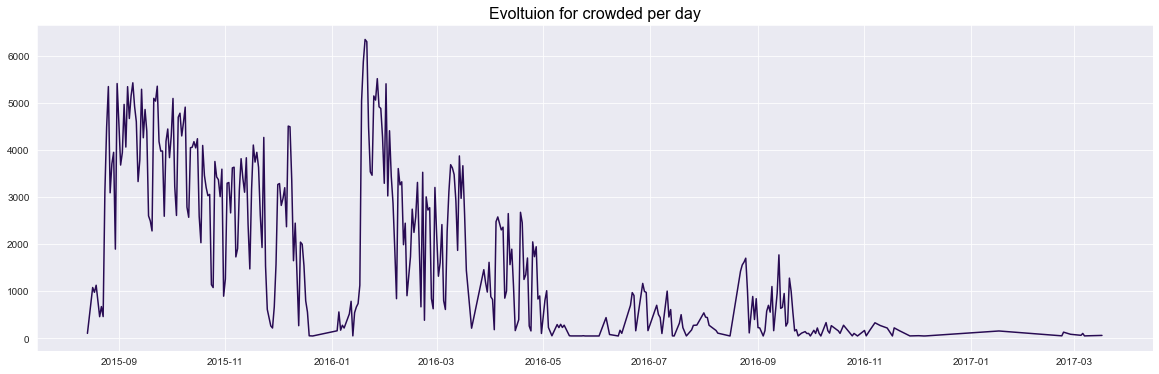

In [41]:
#Graphic to see evolution of class crowded on time series
crowded_graph = series_tsa(data=gym, filter_criterion='crowded')
g2 = sns.lineplot(x=crowded_graph.index, y=crowded_graph['number_people'])
configuration(g2, title='Evoltuion for crowded per day', colors='black')

================================================================
- seems which trend of this class is decreasing on the time series
- these are data correct?
- let's see compare with others features

================================================================

<AxesSubplot:xlabel='date', ylabel='number_people'>

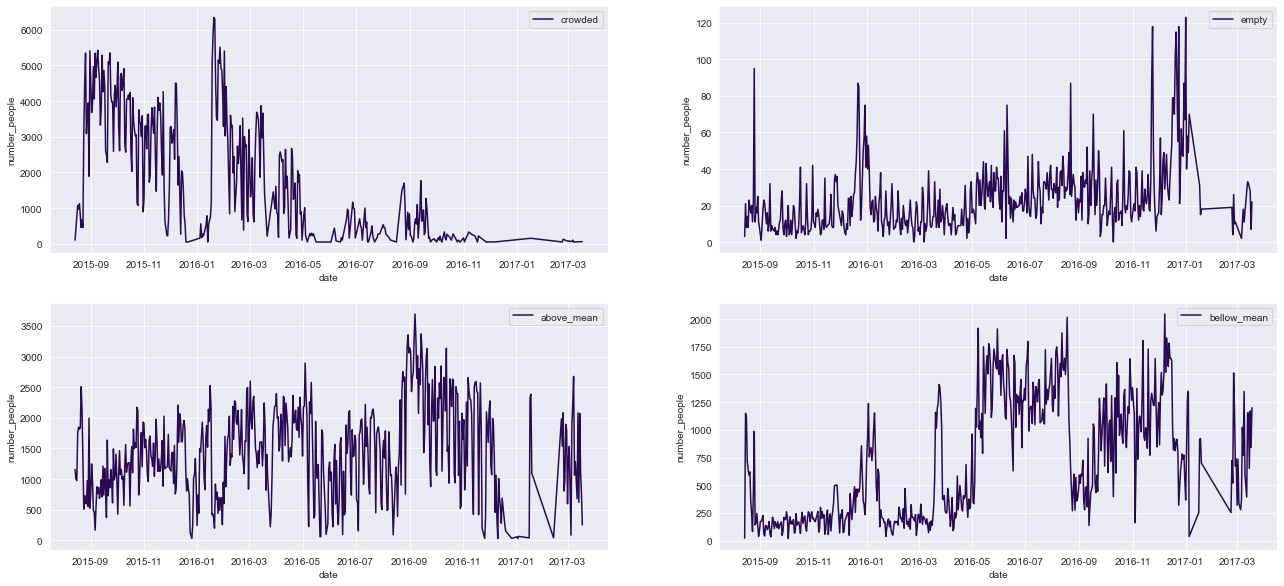

In [42]:
#set variables
empty_graph = series_tsa(data=gym, filter_criterion='empty')
above_mean_graph = series_tsa(data=gym, filter_criterion='above_mean')
bellow_mean_graph = series_tsa(data=gym, filter_criterion='bellow_mean')


#set graphics
fig, axes = plt.pyplot.subplots(2,2, figsize=(22,10))

sns.lineplot(x=crowded_graph.index, y=crowded_graph['number_people'], ax=axes[0,0], label='crowded')
sns.lineplot(x=empty_graph.index, y=empty_graph['number_people'], ax=axes[0,1], label='empty')
sns.lineplot(x=above_mean_graph.index, y=above_mean_graph['number_people'], ax=axes[1,0], label='above_mean')
sns.lineplot(x=bellow_mean_graph.index, y=bellow_mean_graph['number_people'], ax=axes[1,1], label='bellow_mean')


================================================================
- the variation of features on time series shows that there is no stationarity (needs statistic tests to proff that) and this clarify which this **is not a regression problem, but a classification one**

- Obs.: some is not right with data after jan/2017; what need I to do with that?

================================================================

# Year analysis

In [47]:
gym.groupby(['year', 'month'])['number_people'].mean()

year  month
2015  8        38.570696
      9        55.552706
      10       49.938015
      11       42.120660
      12       29.702346
2016  1        40.347094
      2        43.222028
      3        36.844186
      4        38.538406
      5        19.837116
      6        20.309137
      7        20.730380
      8        21.958939
      9        27.108653
      10       22.165446
      11       19.587717
      12       12.257303
2017  1        12.973477
      2        23.470426
      3        25.069539
Name: number_people, dtype: float64

In [58]:
pd.crosstab(index=[gym['year'], gym['month']], columns=gym['class_crowded_3'], normalize='index').round(3)

class_crowded_3  above_mean  bellow_mean  crowded  empty
year month                                              
2015 8                0.330        0.241    0.304  0.126
     9                0.216        0.067    0.629  0.087
     10               0.309        0.084    0.506  0.101
     11               0.334        0.114    0.390  0.162
     12               0.299        0.151    0.220  0.329
2016 1                0.276        0.243    0.344  0.137
     2                0.402        0.096    0.381  0.121
     3                0.373        0.238    0.260  0.130
     4                0.485        0.165    0.248  0.101
     5                0.247        0.478    0.015  0.260
     6                0.225        0.484    0.031  0.260
     7                0.268        0.434    0.023  0.275
     8                0.278        0.416    0.047  0.259
     9                0.478        0.223    0.056  0.243
     10               0.368        0.361    0.010  0.260
     11               0.311        0.356    0.008  0.325
     12               0.113        0.401    0.001  0.485
2017 1                0.163        0.390    0.003  0.444
     2                0.425        0.345    0.006  0.224
     3                0.432        0.409    0.005  0.153

================================================================

- clearly, the volume of persons in gym has a decrease trend and will be a lot of times with a number of people bellow mean

- but the number between last months of 2016 and first in 2017 are very distinct for all trend or seasonal data in the past. Is possible that are some problem with data collection.

================================================================

### Check cutoff for class_crowded_3

In [65]:
print('Cutoffs for classification in feature class_crowded_3')
print(f'Mean = {mean:.2f}\nStandard Deviation = {std:.2f}\nLower Limit = {lower_limit:.2f}\nUpper Limit = {upper_limit:.2f}')

Cutoffs for classification in feature class_crowded_3
Mean = 29.07
Standard Deviation = 22.69
Lower Limit = 6.00
Upper Limit = 52.00


array([0, 1, 2, 3, 5, 6, 4], dtype=int64)

In [81]:
print('Check class Empty (minimum 6 persons on gym)')
print('Max')
print(gym.query('date>="2017-01-01" & class_crowded_3=="empty"')['number_people'].max())

print('')
print('Check class Bellow Mean (between 7 and 29 persons on gym)')
print('Min')
print(gym.query('date>="2017-01-01" & class_crowded_3=="bellow_mean"')['number_people'].min())
print('Max')
print(gym.query('date>="2017-01-01" & class_crowded_3=="bellow_mean"')['number_people'].max())

print('')
print('Check class Above Mean (between 30 and 51 persons on gym)')
print('Min')
print(gym.query('date>="2017-01-01" & class_crowded_3=="above_mean"')['number_people'].min())
print('Max')
print(gym.query('date>="2017-01-01" & class_crowded_3=="above_mean"')['number_people'].max())

print('')
print('Check class Crowded (above 52 persons on gym)')
print('Min')
print(gym.query('date>="2017-01-01" & class_crowded_3=="crowded"')['number_people'].min())

Check class Empty (minimum 6 persons on gym)
Max
6

Check class Bellow Mean (between 7 and 29 persons on gym)
Min
7
Max
29

Check class Above Mean (between 30 and 51 persons on gym)
Min
30
Max
51

Check class Crowded (above 52 persons on gym)
Min
52


================================================================
- there are no problems with transformations made in dataset on feature class_crowded
- seems the problem is in the dataset
- the share of dataset points for 2017 are only 4% for all data, so I will drop this year before engineering model

================================================================

In [89]:
#exclude datapoints for 2017
gym = gym.query('date<"2017-01-01"')
gym.tail()

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,day_of_month,class_crowded,class_crowded_2,class_crowded_3
59111,0,2016-12-31,5,1,0,48.97,0,0,12,23,2016,31,bellow_mean,bellow_mean,empty
59112,0,2016-12-31,5,1,0,48.97,0,0,12,23,2016,31,bellow_mean,bellow_mean,empty
59113,0,2016-12-31,5,1,0,48.97,0,0,12,23,2016,31,bellow_mean,bellow_mean,empty
59114,0,2016-12-31,5,1,0,48.97,0,0,12,23,2016,31,bellow_mean,bellow_mean,empty
59115,0,2016-12-31,5,1,0,48.97,0,0,12,23,2016,31,bellow_mean,bellow_mean,empty


# Correlation with numeric features

In [132]:
#transform features year and month in numeric
gym['year'] = pd.to_numeric(gym['year'])
gym['month'] = pd.to_numeric(gym['month'])
gym['day_of_month'] = pd.to_numeric(gym['day_of_month'])

gym.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59116 entries, 0 to 59115
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         59116 non-null  int64  
 1   date                  59116 non-null  object 
 2   day_of_week           59116 non-null  int64  
 3   is_weekend            59116 non-null  int64  
 4   is_holiday            59116 non-null  int64  
 5   temperature           59116 non-null  float64
 6   is_start_of_semester  59116 non-null  int64  
 7   is_during_semester    59116 non-null  int64  
 8   month                 59116 non-null  int64  
 9   hour                  59116 non-null  int64  
 10  year                  59116 non-null  int64  
 11  day_of_month          59116 non-null  int64  
 12  class_crowded         59116 non-null  object 
 13  class_crowded_2       59116 non-null  object 
 14  class_crowded_3       59116 non-null  object 
dtypes: float64(1), int6

In [133]:
print('Correlation')
gym[['number_people', 'hour', 'temperature', 'day_of_week', 'month', 'year', 'is_start_of_semester', 'is_during_semester', 'is_weekend', 'day_of_month']].corr()

Correlation


,number_people,hour,temperature,day_of_week,month,year,is_start_of_semester,is_during_semester,is_weekend,day_of_month
number_people,1.000000,0.553047,0.365522,-0.169099,-0.141635,-0.331770,0.193447,0.339172,-0.177395,-0.069333
hour,0.553047,1.000000,0.182138,-0.002885,-0.034591,-0.086735,0.016216,0.047686,-0.001348,0.001634
temperature,0.365522,0.182138,1.000000,0.001331,-0.021194,-0.162137,0.122662,0.165718,0.018719,-0.041209
day_of_week,-0.169099,-0.002885,0.001331,1.000000,-0.003529,0.005981,-0.002729,-0.004910,0.791314,-0.005814
month,-0.141635,-0.034591,-0.021194,-0.003529,1.000000,-0.409442,-0.130393,0.122029,-0.008231,0.003472
year,-0.331770,-0.086735,-0.162137,0.005981,-0.409442,1.000000,-0.042605,-0.187993,0.002731,-0.041375
is_start_of_semester,0.193447,0.016216,0.122662,-0.002729,-0.130393,-0.042605,1.000000,0.209727,-0.005810,0.074461
is_during_semester,0.339172,0.047686,0.165718,-0.004910,0.122029,-0.187993,0.209727,1.000000,-0.032912,-0.095676
is_weekend,-0.177395,-0.001348,0.018719,0.791314,-0.008231,0.002731,-0.005810,-0.032912,1.000000,0.007003
day_of_month,-0.069333,0.001634,-0.041209,-0.005814,0.003472,-0.041375,0.074461,-0.095676,0.007003,1.000000


# Tables for categoric features

In [123]:
pd.crosstab(index=gym['day_of_week'], columns=gym['class_crowded_3'])

class_crowded_3,above_mean,bellow_mean,crowded,empty
day_of_week,,,,
0,2686,2327,1840,1498
1,2935,2329,1745,1551
2,2817,2353,1713,1502
3,2726,2423,1524,1693
4,2633,2466,1455,1897
5,2094,2505,989,2977
6,2203,2810,786,2639


In [126]:
pd.crosstab(index=gym['day_of_month'], columns=gym['class_crowded_3'])

class_crowded_3,above_mean,bellow_mean,crowded,empty
day_of_month,,,,
01,611,539,338,362
02,642,538,334,339
03,580,553,325,399
04,584,509,333,409
05,648,538,358,381
06,652,538,349,406
07,643,509,330,389
08,556,595,386,352
09,577,482,384,333


In [127]:
pd.crosstab(index=gym['is_weekend'], columns=gym['class_crowded_3'])

class_crowded_3,above_mean,bellow_mean,crowded,empty
is_weekend,,,,
0,13797,11898,8277,8141
1,4297,5315,1775,5616


In [128]:
pd.crosstab(index=gym['is_holiday'], columns=gym['class_crowded_3'])

class_crowded_3,above_mean,bellow_mean,crowded,empty
is_holiday,,,,
0,18094,17213,10052,13757


================================================================
- Most correlated features with number_people = hour, temperature, semester and year. But I will use all for building a model, except day_of_month which has few correlation and no changes in contingency tables

- I will drop too class_crowded, class_crowded_2 and date

================================================================

In [135]:
#Drop columns
gym.drop(columns=['date', 'day_of_month', 'class_crowded', 'class_crowded_2'], inplace=True)
gym.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,class_crowded_3
0,37,4,0,0,71.76,0,0,8,17,2015,above_mean
1,45,4,0,0,71.76,0,0,8,17,2015,above_mean
2,40,4,0,0,71.76,0,0,8,17,2015,above_mean
3,44,4,0,0,71.76,0,0,8,17,2015,above_mean
4,45,4,0,0,71.76,0,0,8,17,2015,above_mean


In [136]:
#Save file
gym.to_csv('gym_model.csv', index=False)